In [1]:
import hdbscan
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import manifold
import os
import json
from matplotlib.colors import LinearSegmentedColormap

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000)

In [2]:
MATERIAL_PATH = "../../All_mat_new_test_score_with_horz_flat_index.csv"
#DATA_PATH = "../../data"

# "henry's local data path"
DATA_PATH = "../../../MPhys_Project/data extraction+fingerprinting/FULL_MATPEDIA_DATA"

## Start with Anupam's list of materials

In [3]:
material_df = pd.read_csv("../../All_mat_new_test_score_with_horz_flat_index.csv", index_col="ID")
print(material_df.shape)
material_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../../All_mat_new_test_score_with_horz_flat_index.csv'

In [14]:
# Select flat materials only
flat_df = material_df[material_df.horz_flat_seg > 0]
flat_df.shape

(2005, 24)

## Read in anupam's fingerprints here


In [15]:
import csv
Inp=[]
with open('input_flat_materials_244 (2).csv','r') as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        Inp.append(row)
Input=np.array(Inp)
finger_print_array = Input
print(finger_print_array)


Inp2=[]
with open('input_indices_244.csv','r') as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        Inp2.append("2dm-"+str(row[0]))
#print(Inp2)
Input2=np.array(Inp2)
print(Input2)


[['0.00095621588570265' '0.00120049635912853' '0.00265397411836174' ...
  '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '0']
 ...
 ['0' '0' '0' ... '0' '0' '0']
 ['0.0556027744938957' '0.0336091542804928' '0.0906179808572843' ... '0'
  '0' '0']
 ['0' '0' '0' ... '0' '0' '0']]
['2dm-3' '2dm-21' '2dm-22' ... '2dm-6447' '2dm-6449' '2dm-6450']


In [16]:
df = flat_df.join(pd.DataFrame(Input, index=Input2))
df.head()

,formula,gen_formula,space_group,segments,flat_segments,flatness_score,discovery,...,237,238,239,240,241,242,243
ID,,,,,,,,,,,,,,,
2dm-3,TlS,AB,2,4,4,0.84646,bottom-up,...,0,0,0,0,0,0,0
2dm-21,TaI3,AB3,162,3,3,0.88201,bottom-up,...,0,0,0,0,0,0,0
2dm-22,Li2O,AB2,164,3,3,0.96678,bottom-up,...,0,0,0,0,0,0,0
2dm-25,VBr4,AB4,123,3,3,0.97834,bottom-up,...,0,0,0,0,0,0,0
2dm-29,SBr,AB,2,4,4,0.82037,bottom-up,...,0,0,0,0,0,0,0


In [17]:
columns = list(range(244))

In [18]:
df = df[ df[columns].isna().sum(axis=1) == 0 ]

In [19]:
#check for NaNs 
np.isnan(finger_print_array).sum()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [20]:
df.isna().sum()[ df.isna().sum() != 0 ]

exfoliation_eg     603
decomp_eng          46
B                   10
C                 1116
D                 1741
E                 1993
F                 1993
dtype: int64

In [21]:
# save df
df.to_csv("materials_data_anupam's_fingerprints.csv")
df

,formula,gen_formula,space_group,segments,flat_segments,flatness_score,discovery,...,237,238,239,240,241,242,243
ID,,,,,,,,,,,,,,,
2dm-3,TlS,AB,2,4,4,0.84646,bottom-up,...,0,0,0,0,0,0,0
2dm-21,TaI3,AB3,162,3,3,0.88201,bottom-up,...,0,0,0,0,0,0,0
2dm-22,Li2O,AB2,164,3,3,0.96678,bottom-up,...,0,0,0,0,0,0,0
2dm-25,VBr4,AB4,123,3,3,0.97834,bottom-up,...,0,0,0,0,0,0,0
2dm-29,SBr,AB,2,4,4,0.82037,bottom-up,...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2dm-6436,Sn2O5,A2B5,30,4,4,0.84160,bottom-up,...,0,0,0,0,0,0,0
2dm-6444,Ge2O5,A2B5,30,4,4,0.95138,bottom-up,...,0,0,0,0,0,0,0
2dm-6447,CeS2,AB2,160,5,5,0.87940,bottom-up,...,0,0,0,0,0,0,0


## Clustering

In [3]:
df = pd.read_csv("materials_data_anupam's_fingerprints.csv")
fingerprint_length = 244
fingerprint_cols = [str(i) for i in range(fingerprint_length)]
fingerprint_array = df[fingerprint_cols]

clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,\
                        gen_min_span_tree=False, leaf_size=40, metric='minkowski', cluster_selection_method='eom', min_cluster_size=6, min_samples=6, p=0.2)
clusterer.fit(fingerprint_array)

labels = clusterer.labels_
df["labels"] = labels
print(np.unique(labels, return_counts=True))
df[df.labels==29].head(30)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42]), array([1362,   10,    9,    9,    6,   57,    7,    8,   12,   16,    9,
         14,   11,    8,    9,   11,    6,   12,    7,   10,   13,    9,
          9,   81,    7,   29,   11,   15,    9,    8,   33,    7,    7,
          7,   10,    9,    6,   13,   13,    8,   46,   16,   24,   10]))


,ID,formula,gen_formula,space_group,segments,flat_segments,flatness_score,...,238,239,240,241,242,243,labels
3,2dm-25,VBr4,AB4,123,3,3,0.97834,...,0.0,0,0.0,0.0,0.0,0,29
179,2dm-723,OsCl4,AB4,14,4,4,0.87758,...,0.0,0,0.0,0.0,0.0,0,29
280,2dm-1063,CeSi2,AB2,123,3,3,0.97122,...,0.0,0,0.0,0.0,0.0,0,29
299,2dm-1115,NiSe2,AB2,14,4,4,0.83425,...,0.0,0,0.0,0.0,0.0,0,29
306,2dm-1129,Sr2Co,AB2,123,3,3,0.69227,...,0.0,0,0.0,0.0,0.0,0,29
312,2dm-1151,CeC2,AB2,123,3,3,0.95186,...,0.0,0,0.0,0.0,0.0,0,29
314,2dm-1156,CeSn2,AB2,123,3,3,0.97447,...,0.0,0,0.0,0.0,0.0,0,29
337,2dm-1243,CePb2,AB2,123,3,3,0.97444,...,0.0,0,0.0,0.0,0.0,0,29
338,2dm-1245,NiPb4,AB4,125,3,3,0.83687,...,0.0,0,0.0,0.0,0.0,0,29
347,2dm-1273,VI4,AB4,123,3,3,0.91735,...,0.0,0,0.0,0.0,0.0,0,29


In [13]:
from ipywidgets import interact

def view_cluster(label):
    display(df[df.labels==label].head(10))

    num_plots = len(df[df.labels==label])

    fig, ax = plt.subplots(num_plots, 1, figsize=(4, 1*num_plots))

    for i, index in enumerate(df[df.labels==label].index):
        # ax[i].bar(edges[:-1], df.loc[index][fingerprint_cols], align="edge", width=edges[1]-edges[0])?
        ax[i].plot(np.linspace(-8, 8, fingerprint_length), df.loc[index][fingerprint_cols])


interact(view_cluster, label=(-1, len(np.unique(labels))-2, 1))
display(df[df.ID=="2dm-2600"])

interactive(children=(IntSlider(value=20, description='label', max=42, min=-1), Output()), _dom_classes=('widg…

,ID,formula,gen_formula,space_group,segments,flat_segments,flatness_score,...,238,239,240,241,242,243,labels
760,2dm-2600,Ga2S3,A2B3,1,4,4,0.96402,...,0.0,0,0.0,0.0,0.0,0,-1


In [6]:
interact(view_cluster, label=(-1, len(np.unique(labels))-2, 1))

interactive(children=(IntSlider(value=20, description='label', max=42, min=-1), Output()), _dom_classes=('widg…

<function __main__.view_cluster(label)>

# OUR CLUSTERS

In [4]:
FINGERPRINT_LENGTH = 98

#FINGERPRINT_NAME = "functional_10dpi_bernoulli_VAE_L={0}".format(FINGERPRINT_LENGTH)
FINGERPRINT_NAME = "224_2channel_resnet_L={0}".format(FINGERPRINT_LENGTH)
# FINGERPRINT_NAME = "all_k_branches_histogram_-8_to_8".format(FINGERPRINT_LENGTH)
# FINGERPRINT_NAME = "128x128_random_erase_resnet18_VAE_L={0}".format(FINGERPRINT_LENGTH)

PERPLEXITY = 30
FLAT_ONLY = True
BORING_COLUMNS = ["flat_segments", "flatness_score", "binary_flatness", "horz_flat_seg", "exfoliation_eg", "A", "B", "C", "D", "E", "F"]
INPUT_NAME = f"{FINGERPRINT_NAME}_perplexity_{PERPLEXITY}_length_{FINGERPRINT_LENGTH}.csv"

In [5]:
df_2 = pd.read_csv(f"../../fingerprints/{INPUT_NAME}")
if FLAT_ONLY:
    df_2 = df_2[df_2.horz_flat_seg>0]
df_2.head()

fingerprint_cols_2 = [str(i) for i in range(FINGERPRINT_LENGTH)]
BORING_COLUMNS += fingerprint_cols_2

In [6]:
# clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,\
#                         gen_min_span_tree=True, leaf_size=40, metric='minkowski', cluster_selection_method='leaf', min_cluster_size=6, min_samples=2, p=0.2)

clusterer_2 = hdbscan.HDBSCAN(algorithm='best', alpha=0.8, approx_min_span_tree=True,\
gen_min_span_tree=False, leaf_size=40, metric='minkowski', cluster_selection_method='leaf', min_cluster_size=6, min_samples=2, p=0.2)

clusterer_2.fit(df_2[fingerprint_cols_2])

labels_2 = clusterer_2.labels_
df_2["labels"] = labels_2
#df_2["member_strength"] = clusterer_2.probabilities_
df_2[df_2.labels==38].head(19)
#print(df_2.index[1])

,ID,formula,gen_formula,space_group,segments,flat_segments,flatness_score,...,94,95,96,97,fx,fy,labels
376,2dm-401,MoS3,AB3,14,4,4,0.83684,...,2.992969,2.704516,2.647496,2.823139,-125.28775,-52.162083,38
640,2dm-684,NbTe2,AB2,2,4,4,0.99236,...,2.701447,2.675659,2.714955,2.779525,-138.98457,-64.181440,38
1280,2dm-1390,WS3,AB3,14,4,4,0.89014,...,2.786536,2.558453,2.732575,2.716396,-125.54242,-52.416164,38
1532,2dm-1661,NbTe2,AB2,12,5,5,0.95441,...,2.547163,2.646659,2.528497,2.700752,-137.31633,-64.275310,38
1644,2dm-1781,TaTe2,AB2,2,4,4,0.98765,...,2.655947,2.651948,2.666260,2.678349,-139.39467,-64.029010,38
1689,2dm-1829,Te3W,AB3,14,4,4,0.99261,...,2.414061,2.450804,2.369822,2.876198,-127.02869,-54.423717,38
1830,2dm-1988,Si3As4,A3B4,1,4,4,0.75412,...,2.525611,2.447950,2.431037,2.262234,-107.29348,-27.590958,38
1844,2dm-2007,MoSe3,AB3,14,4,4,0.96063,...,2.302569,2.529596,2.557750,2.301805,-126.39939,-53.930386,38
2155,2dm-2352,Al2Te3,A2B3,8,5,5,0.84034,...,2.544886,2.431981,2.317205,2.600342,-90.73142,-11.822838,38
2329,2dm-2551,Al2Se3,A2B3,1,4,4,0.95854,...,2.866658,2.513502,2.684730,2.533837,-143.11590,-55.788418,38


# OLD:

In [25]:
df_2 = pd.read_csv("../materials_data_all_k_branches_fingerprint_60.csv")
fingerprint_length_2 = 60
fingerprint_cols_2 = [str(i) for i in range(fingerprint_length_2)]
fingerprint_array_2 = df_2[fingerprint_cols_2]

clusterer_2 = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,\
                        gen_min_span_tree=False, leaf_size=40, metric='minkowski', cluster_selection_method='leaf', min_cluster_size=4, min_samples=4, p=0.2)
clusterer_2.fit(fingerprint_array_2)

labels_2 = clusterer_2.labels_
df_2["labels"] = labels_2
print(np.unique(labels_2, return_counts=True))
df_2[df_2.labels==1].head(19)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40], dtype=int64), array([1710,    8,    5,   14,    7,    6,    5,    7,    4,    6,    6,
          5,    4,    5,    6,    7,    5,    9,    5,    5,    7,    8,
          9,    6,   11,    9,    4,    5,    5,    6,    4,    4,    8,
          8,   12,    4,   14,    5,    4,    6,   29,    8], dtype=int64))


,ID,formula,gen_formula,space_group,segments,flat_segments,flatness_score,...,54,55,56,57,58,59,labels
233,2dm-900,Ga2Te,AB2,143,3,3,0.78315,...,398.0,224.0,0.0,0.0,0.0,0.0,1
236,2dm-903,Ga2Te,AB2,143,3,3,0.81656,...,390.0,219.0,0.0,0.0,0.0,0.0,1
240,2dm-910,Ga2Se,AB2,143,3,3,0.87920,...,343.0,276.0,0.0,0.0,0.0,0.0,1
522,2dm-1777,Ga2S,AB2,143,3,3,0.87920,...,319.0,309.0,91.0,0.0,0.0,0.0,1
531,2dm-1794,Ga2S,AB2,143,3,3,0.84263,...,331.0,305.0,70.0,0.0,0.0,0.0,1


In [26]:
def view_cluster_2(label):
    display(df_2[df_2.labels==label].head(100))

    num_plots = len(df_2[df_2.labels==label])

    fig, ax = plt.subplots(num_plots, 1, figsize=(4, 1*num_plots))

    for i, index in enumerate(df_2[df_2.labels==label].index):
        # ax[i].bar(edges[:-1], df.loc[index][fingerprint_cols], align="edge", width=edges[1]-edges[0])?
        ax[i].plot(np.linspace(-8, 8, fingerprint_length_2), df_2.loc[index][fingerprint_cols_2])


    
    
interact(view_cluster_2, label=(-1, len(np.unique(labels_2))-2, 1))
df_2[df_2.ID=="2dm-2600"]

interactive(children=(IntSlider(value=19, description='label', max=40, min=-1), Output()), _dom_classes=('widg…

,ID,formula,gen_formula,space_group,segments,flat_segments,flatness_score,...,54,55,56,57,58,59,labels
768,2dm-2600,Ga2S3,A2B3,1,4,4,0.96402,...,171.0,220.0,296.0,329.0,142.0,0.0,2


# Pick out one material to see which cluster it's in in both cluster sets

In [7]:
def compare_cluster_of_one_material(formula):
    print("anupam:")
    df_one_chemical = df[df.formula==formula]
    cluster_ids = np.array(df_one_chemical.labels)
    for id_ in cluster_ids:
        if id_==-1:
            print("UNCLUSTERED")
        else:
            display(df[df.labels==id_])
    
    
    #print(df[df.labels==df[df.formula==formula].labels])
    print("HP+Tom:")
    df_one_chemical_2 = df_2[df_2.formula==formula]
    cluster_ids_2 = np.array(df_one_chemical_2.labels)
    for id_ in cluster_ids_2:
        if id_==-1:
            print("UNCLUSTERED")
        else:
            display(df_2[df_2.labels==id_])
            
def compare_cluster_of_one_material(mat_ID):
    print("anupam:")
    df_one_chemical = df[df.ID==mat_ID]
    cluster_ids = np.array(df_one_chemical.labels)
    for id_ in cluster_ids:
        if id_==-1:
            print("UNCLUSTERED")
        else:
            display(df[df.labels==id_])
    
    
    #print(df[df.labels==df[df.formula==formula].labels])
    print("HP+Tom:")
    df_one_chemical_2 = df_2[df_2.ID==mat_ID]
    cluster_ids_2 = np.array(df_one_chemical_2.labels)
    for id_ in cluster_ids_2:
        if id_==-1:
            print("UNCLUSTERED")
        else:
            display(df_2[df_2.labels==id_])

#compare_cluster_of_one_material("AsBr3")
compare_cluster_of_one_material("2dm-2600")

anupam:
UNCLUSTERED
HP+Tom:


,ID,formula,gen_formula,space_group,segments,flat_segments,flatness_score,...,94,95,96,97,fx,fy,labels
376,2dm-401,MoS3,AB3,14,4,4,0.83684,...,2.992969,2.704516,2.647496,2.823139,-125.28775,-52.162083,38
640,2dm-684,NbTe2,AB2,2,4,4,0.99236,...,2.701447,2.675659,2.714955,2.779525,-138.98457,-64.181440,38
1280,2dm-1390,WS3,AB3,14,4,4,0.89014,...,2.786536,2.558453,2.732575,2.716396,-125.54242,-52.416164,38
1532,2dm-1661,NbTe2,AB2,12,5,5,0.95441,...,2.547163,2.646659,2.528497,2.700752,-137.31633,-64.275310,38
1644,2dm-1781,TaTe2,AB2,2,4,4,0.98765,...,2.655947,2.651948,2.666260,2.678349,-139.39467,-64.029010,38
1689,2dm-1829,Te3W,AB3,14,4,4,0.99261,...,2.414061,2.450804,2.369822,2.876198,-127.02869,-54.423717,38
1830,2dm-1988,Si3As4,A3B4,1,4,4,0.75412,...,2.525611,2.447950,2.431037,2.262234,-107.29348,-27.590958,38
1844,2dm-2007,MoSe3,AB3,14,4,4,0.96063,...,2.302569,2.529596,2.557750,2.301805,-126.39939,-53.930386,38
2155,2dm-2352,Al2Te3,A2B3,8,5,5,0.84034,...,2.544886,2.431981,2.317205,2.600342,-90.73142,-11.822838,38
2329,2dm-2551,Al2Se3,A2B3,1,4,4,0.95854,...,2.866658,2.513502,2.684730,2.533837,-143.11590,-55.788418,38


# BEST COMPARISON METHOD
this shows a certain cluster from our run along with the anupam cluster ids (sorted) from his run
it also does the reverse of this for a given pam cluster id

In [14]:

df_rename = df.rename(columns={'labels': 'pam_labels'})
df_2_rename = df_2.rename(columns={'labels':'th_labels'})

df_cut = df_rename[["ID","pam_labels"]]
df_all_labels = pd.merge(df_2_rename, df_cut, on='ID', how='inner')

# display(df_all_labels)
# display(df_all_labels[df_all_labels.th_labels==21])

def view_cluster_combined_th(label):
    sorted_subset = df_all_labels[df_all_labels.th_labels==label].sort_values(by='pam_labels')
    display(sorted_subset.head(8))
def view_cluster_combined_pam(label):
    sorted_subset = df_all_labels[df_all_labels.pam_labels==label].sort_values(by='th_labels')
    display(sorted_subset.head(8))

interact(view_cluster_combined_th, label=(-1, len(np.unique(labels_2))-2, 1))
interact(view_cluster_combined_pam, label=(-1, len(np.unique(labels))-2, 1))

interactive(children=(IntSlider(value=23, description='label', max=47, min=-1), Output()), _dom_classes=('widg…

interactive(children=(IntSlider(value=20, description='label', max=42, min=-1), Output()), _dom_classes=('widg…

<function __main__.view_cluster_combined_pam(label)>

In [15]:
ID_test = "2dm-1446"
print("TH")
display(df_2[df_2.ID==ID_test])
print("ANUPAM")
display(df[df.ID==ID_test])

TH


,ID,formula,gen_formula,space_group,segments,flat_segments,flatness_score,...,94,95,96,97,fx,fy,labels
1334,2dm-1446,VBr3,AB3,162,3,3,0.97137,...,2.256537,2.770921,2.491376,2.701213,80.77287,73.65113,22


ANUPAM


,ID,formula,gen_formula,space_group,segments,flat_segments,flatness_score,...,238,239,240,241,242,243,labels
412,2dm-1446,VBr3,AB3,162,3,3,0.97137,...,0.0,0,0.0,0.0,0.0,0,4


In [18]:
df_all_labels.to_csv("TH_and_Anupam_cluster_labels.csv")

In [17]:
df_all_labels.head(10)

,ID,formula,gen_formula,space_group,segments,flat_segments,flatness_score,...,95,96,97,fx,fy,th_labels,pam_labels
0,2dm-3,TlS,AB,2,4,4,0.84646,...,1.718350,1.920829,1.940830,-17.031164,-22.583645,-1,-1
1,2dm-21,TaI3,AB3,162,3,3,0.88201,...,2.217409,2.636327,2.281451,-85.320190,19.231680,-1,4
2,2dm-22,Li2O,AB2,164,3,3,0.96678,...,1.716548,1.714002,1.817789,74.049220,-91.258260,-1,0
3,2dm-25,VBr4,AB4,123,3,3,0.97834,...,2.584419,2.809708,2.114330,36.688946,55.726463,-1,29
4,2dm-29,SBr,AB,2,4,4,0.82037,...,2.280239,2.296243,2.235125,11.995536,-106.832634,31,-1
5,2dm-31,AlF3,AB3,12,3,3,0.91302,...,2.198094,2.495989,2.491156,190.981610,14.114123,30,39
6,2dm-32,MoBr3,AB3,12,3,3,0.97822,...,2.545511,2.544856,2.491382,78.335640,68.976230,22,4
7,2dm-34,GaSb3,AB3,164,3,3,0.73300,...,2.063323,1.905523,1.790170,-123.318930,57.101960,-1,-1
8,2dm-56,YbF2,AB2,164,3,3,0.78940,...,1.793689,1.798209,1.732302,164.964750,27.765863,-1,-1
9,2dm-79,NCl4,AB4,1,4,4,0.96742,...,2.539618,2.534813,2.522714,43.405037,84.966225,-1,-1


## T-SNE Plot

In [101]:
n_components=2
tsne = manifold.TSNE(n_components=n_components, early_exaggeration=12.0, init="pca",learning_rate=100, random_state=0, perplexity=30 ,n_iter=10000, verbose=2)
fingerprints_2d = tsne.fit_transform(fingerprint_array)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1993 samples in 0.003s...
[t-SNE] Computed neighbors for 1993 samples in 0.067s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1993
[t-SNE] Computed conditional probabilities for sample 1993 / 1993
[t-SNE] Mean sigma: 0.110213
[t-SNE] Computed conditional probabilities in 0.084s
[t-SNE] Iteration 50: error = 72.2479706, gradient norm = 0.0112694 (50 iterations in 0.474s)
[t-SNE] Iteration 100: error = 71.5108185, gradient norm = 0.0024503 (50 iterations in 0.395s)
[t-SNE] Iteration 150: error = 71.4420471, gradient norm = 0.0014011 (50 iterations in 0.367s)
[t-SNE] Iteration 200: error = 71.4200592, gradient norm = 0.0005456 (50 iterations in 0.451s)
[t-SNE] Iteration 250: error = 71.4066238, gradient norm = 0.0005375 (50 iterations in 0.611s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.406624
[t-SNE] Iteration 300: error = 1.3937706, gradient norm = 0.0140555 (50 iterations in 0.523s)

C:\Users\hkpen\AppData\Local\Temp\ipykernel_11156\3318175735.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('turbo')


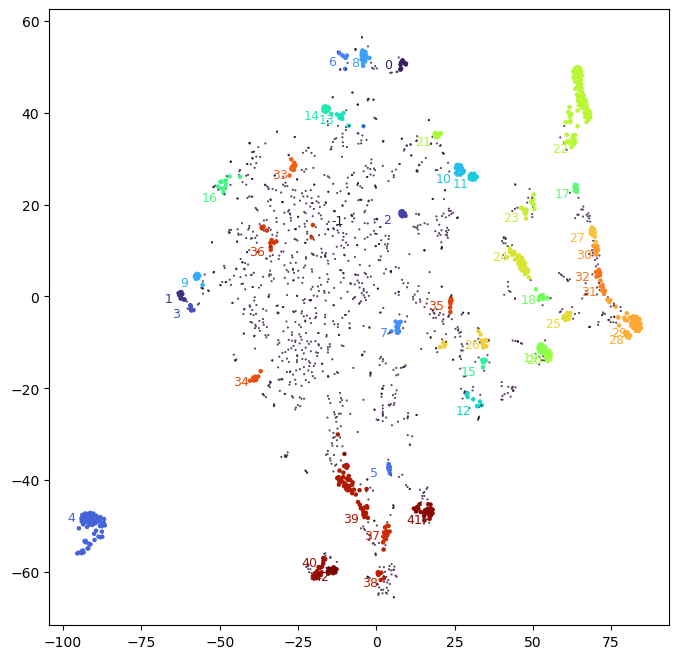

In [107]:
fig = plt.figure(figsize=(8,8))
size=np.ones((len(labels),1))*5
size[labels==-1]=0.2
 
unique_label,cluster_rep_index, counts = np.unique(labels, return_index=True, return_counts=True)
cmap = plt.cm.get_cmap('turbo')
norm = matplotlib.colors.Normalize(vmin=min(labels), vmax=max(labels))
    
for rep_id in cluster_rep_index:
        col=cmap(norm(labels[rep_id]))
        plt.annotate(labels[rep_id],fingerprints_2d[rep_id,:]+[-4.5,-1],color=col,alpha=1, weight='normal', ha='center', va='center', size=9).draggable()

plt.scatter(fingerprints_2d[:,0], fingerprints_2d[:,1],s=size, c=labels*5, cmap="turbo")

<Axes: ylabel='$\\lambda$ value'>

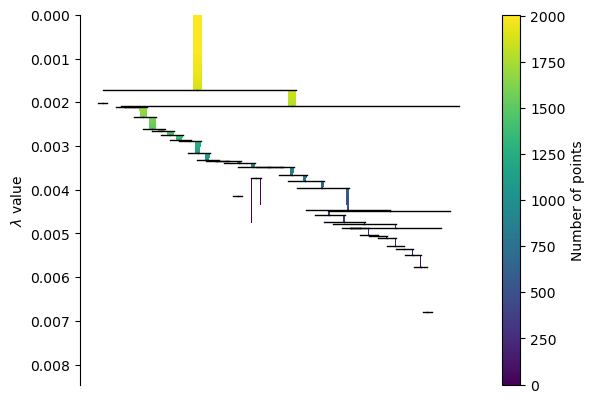

In [30]:
clusterer.condensed_tree_
clusterer.condensed_tree_.plot()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2005 samples in 0.001s...
[t-SNE] Computed neighbors for 2005 samples in 0.069s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2005
[t-SNE] Computed conditional probabilities for sample 2000 / 2005
[t-SNE] Computed conditional probabilities for sample 2005 / 2005
[t-SNE] Mean sigma: 165.883147
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.255951
[t-SNE] KL divergence after 300 iterations: 1.839144


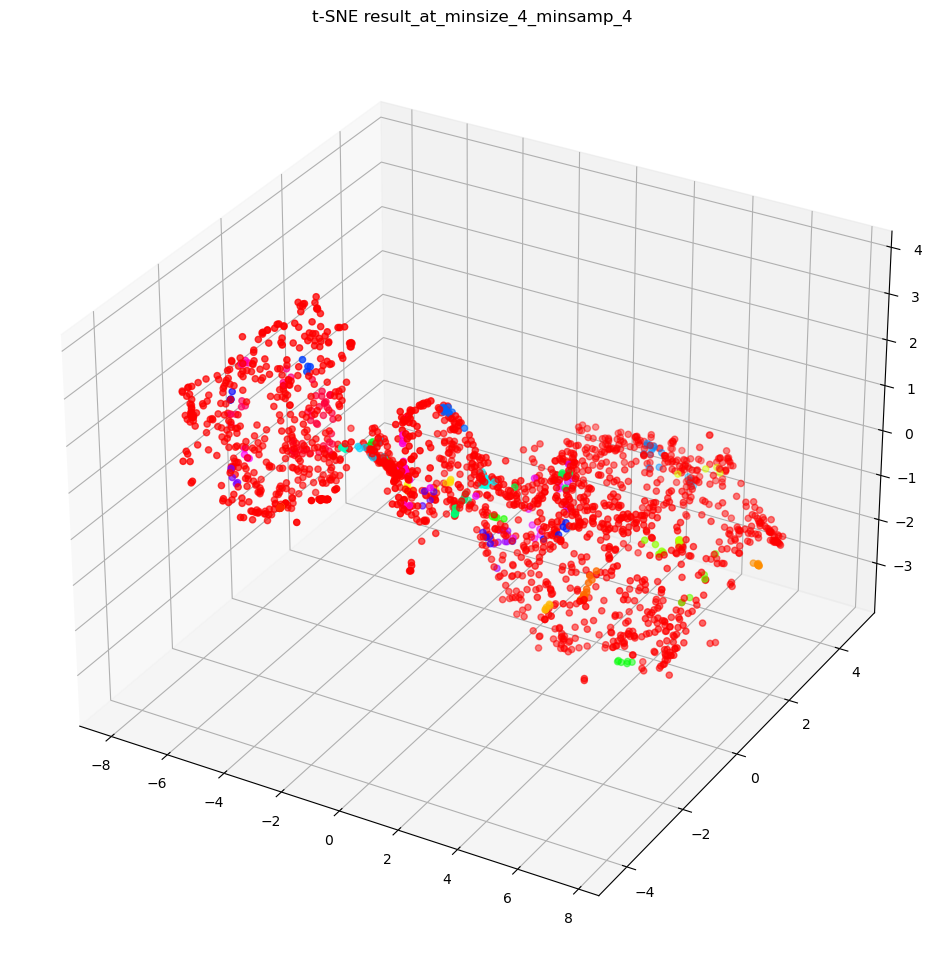

In [18]:
###################################
######### tSNE visualization 3D 
min_size=4
min_samp=4

tsne=manifold.TSNE(n_components=3, verbose=1, perplexity=50, n_iter=300)
ts= tsne.fit_transform(fingerprint_array)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
########
##### for different eps
# for i in np.arange(0.025,0.31,0.025):
#     eps=round(i, 3)
#     label=db.single_linkage_tree_.get_clusters(eps, min_cluster_size=3)
#     n_clusters_ = label.max()
#     n_noise_ = list(label).count(-1)
#     print(str(eps)+' '+str(len(labels))+' '+str(n_clusters_)+' '+str(n_noise_)+' '+str(metrics.silhouette_score(X, label)))
#     ax.scatter(ts[:,0], ts[:,1], ts[:,2], c=labels+1, cmap="hsv")
#     fname="t-SNE result_at_eps"+str(eps)
#     plt.title(fname)
#     plt.savefig(fname+'.png', bbox_inches='tight')
#     plt.show()
###########
###### for current minsize and minsamples
ax.scatter(ts[:,0], ts[:,1], ts[:,2], c=labels+1, cmap="hsv")
fname="t-SNE result_at_minsize_"+str(min_size)+"_minsamp_"+str(min_samp)
plt.title(fname)
plt.savefig(fname+'.png', bbox_inches='tight')
plt.show()